# lab-web-scraping-single-page

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [3]:
url = 'https://www.popvortex.com/music/charts/top-100-songs.php'

In [4]:
response = requests.get(url)
response.status_code

200

In [5]:
soup = BeautifulSoup(response.content, "html.parser")
#print(soup.prettify())

In [7]:
#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p > cite

In [7]:
#soup.select("cite")

In [6]:
title = []
artist = []
rank = []
genre = []

#number of iterations
num_iter = len(soup.select('cite.title'))

#set what to iterate for each empty list
t_list = soup.select('cite.title')
a_list = soup.select('em.artist')
chart_rank = soup.select('p.chart-position')

for i in range(num_iter):
    title.append(t_list[i].get_text())
    artist.append(a_list[i].get_text())
    rank.append(chart_rank[i].get_text())
    
#print(title)
#print(artist)
#print(rank)


In [7]:
top_100 = pd.DataFrame({'rank':rank, 'title': title, 'artist': artist})
top_100.head()

,rank,title,artist
0,1,Unholy,Sam Smith & Kim Petras
1,2,I'm Good (Blue),David Guetta & Bebe Rexha
2,3,Thank God,Kane Brown & Katelyn Brown
3,4,wait in the truck,HARDY & Lainey Wilson
4,5,Everywhere,Fleetwood Mac


In [9]:
# Recommendations based on user input
def song_recommender():
    song_sample = str(input('Welcome to Gnod song recommender!\nEnter your favorite song to recieve a recommendation:\n')).lower()
    if song_sample in top_100['title'].tolist():
        i = random.randint(0,len(top_100))
        print('You may also like',top_100['title'][i].title(), "by",top_100['artist'][i].title())
    else:
        print('There is no song recommendation for you now. Please try again later')

In [10]:
song_recommender()

Welcome to Gnod song recommender!
Enter your favorite song to recieve a recommendation:
v
There is no song recommendation for you now. Please try again later


# web-scraping-multiple-pages

In [11]:
url2 = 'https://www.popvortex.com/music/charts/top-pop-songs.php'

In [12]:
response2 = requests.get(url2)
response2.status_code

200

In [13]:
soup2 = BeautifulSoup(response2.content, "html.parser")
#print(soup2.prettify())

In [14]:
#soup2.select("cite")

In [15]:
title2 = []
artist2 = []
rank2 = []

#number of iterations
num_iter2 = len(soup.select('cite.title'))

#set what to iterate for each empty list
t_list2 = soup2.select('cite.title')
a_list2 = soup2.select('em.artist')
chart_rank2 = soup2.select('p.chart-position')

for i in range(num_iter2):
    title2.append(t_list2[i].get_text())
    artist2.append(a_list2[i].get_text())
    rank2.append(chart_rank2[i].get_text())
    
#print(title2)
#print(artist2)
#print(rank2)


In [17]:
top_100_2 = pd.DataFrame({'rank':rank2, 'title': title2, 'artist': artist2})
top_100_2.head()

,rank,title,artist
0,1,Unholy,Sam Smith & Kim Petras
1,2,Make It With You,Bread
2,3,I Ain't Worried,OneRepublic
3,4,CUFF IT,Beyoncé
4,5,Unstoppable,Sia


In [18]:
top_music = pd.concat([top_100, top_100_2])
top_music

,rank,title,artist
0,1,Unholy,Sam Smith & Kim Petras
1,2,Eagle (feat. KB),Transformation Worship
2,3,I'm Good (Blue),David Guetta & Bebe Rexha
3,4,Everywhere,Fleetwood Mac
4,5,wait in the truck,HARDY & Lainey Wilson
...,...,...,...
95,96,Take On Me (2015 Remastered Version),a-ha
96,97,Return of the Mack,Mark Morrison
97,98,Don't Start Now,Dua Lipa
98,99,"Sunshine on My Shoulders (""Greatest Hits"" Vers...",John Denver


In [19]:
#drop duplicate
top_music.title.duplicated().sum()

34

In [20]:
top_music.drop_duplicates(inplace=True)

In [21]:
top_music

,rank,title,artist
0,1,Unholy,Sam Smith & Kim Petras
1,2,Eagle (feat. KB),Transformation Worship
2,3,I'm Good (Blue),David Guetta & Bebe Rexha
3,4,Everywhere,Fleetwood Mac
4,5,wait in the truck,HARDY & Lainey Wilson
...,...,...,...
95,96,Take On Me (2015 Remastered Version),a-ha
96,97,Return of the Mack,Mark Morrison
97,98,Don't Start Now,Dua Lipa
98,99,"Sunshine on My Shoulders (""Greatest Hits"" Vers...",John Denver


# RESULT FROM LAB 6.5

In [12]:
my_playlist= pd.read_csv('my_playlist.csv')
my_playlist

,song,artist,audio_features_danceability,audio_features_energy,audio_features_key,audio_features_loudness,audio_features_mode,audio_features_speechiness,audio_features_acousticness,audio_features_instrumentalness,audio_features_liveness,audio_features_valence,audio_features_tempo,audio_features_duration_ms,audio_features_time_signature
0,...Ready For It?,Taylor Swift,0.615,0.779,2,-6.454,1,0.1350,0.06650,0.000000,0.1550,0.453,160.000,208198,4
1,Life Changes,Thomas Rhett,0.687,0.845,7,-4.370,1,0.0576,0.10000,0.000000,0.0452,0.809,87.972,190227,4
2,24K Magic,Bruno Mars,0.818,0.803,1,-4.282,1,0.0797,0.03400,0.000000,0.1530,0.632,106.970,225983,4
3,Galway Girl,Ed Sheeran,0.624,0.876,9,-3.374,1,0.1000,0.07350,0.000000,0.3270,0.781,99.943,170827,4
4,Photograph,Ed Sheeran,0.614,0.379,4,-10.480,1,0.0476,0.60700,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,"Piano Concerto No. 26 in D Major, K. 537, ""Cor...",Wolfgang Amadeus Mozart,0.410,0.761,9,-8.507,0,0.0465,0.01980,0.084700,0.2470,0.193,138.712,666572,4
9940,Pebble Beach,Echoes Of Nature,0.406,0.306,3,-10.482,1,0.0372,0.31300,0.007900,0.0727,0.073,135.272,652560,4
9941,The Devil Glitch (Long version),Chris Butler,0.362,0.507,1,-11.229,1,0.0394,0.01740,0.216000,0.1130,0.456,146.641,634440,3
9942,"Symphony in B Minor, Op. 58: Manfred Symphony ...",Pyotr Ilyich Tchaikovsky,0.331,0.733,2,-8.671,1,0.0468,0.08870,0.001740,0.9470,0.380,128.512,620747,4


# LAB 6.06 CLUSTER

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [14]:
data= my_playlist.drop(columns=['song','artist'])
data

,audio_features_danceability,audio_features_energy,audio_features_key,audio_features_loudness,audio_features_mode,audio_features_speechiness,audio_features_acousticness,audio_features_instrumentalness,audio_features_liveness,audio_features_valence,audio_features_tempo,audio_features_duration_ms,audio_features_time_signature
0,0.615,0.779,2,-6.454,1,0.1350,0.06650,0.000000,0.1550,0.453,160.000,208198,4
1,0.687,0.845,7,-4.370,1,0.0576,0.10000,0.000000,0.0452,0.809,87.972,190227,4
2,0.818,0.803,1,-4.282,1,0.0797,0.03400,0.000000,0.1530,0.632,106.970,225983,4
3,0.624,0.876,9,-3.374,1,0.1000,0.07350,0.000000,0.3270,0.781,99.943,170827,4
4,0.614,0.379,4,-10.480,1,0.0476,0.60700,0.000464,0.0986,0.201,107.989,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,0.410,0.761,9,-8.507,0,0.0465,0.01980,0.084700,0.2470,0.193,138.712,666572,4
9940,0.406,0.306,3,-10.482,1,0.0372,0.31300,0.007900,0.0727,0.073,135.272,652560,4
9941,0.362,0.507,1,-11.229,1,0.0394,0.01740,0.216000,0.1130,0.456,146.641,634440,3
9942,0.331,0.733,2,-8.671,1,0.0468,0.08870,0.001740,0.9470,0.380,128.512,620747,4


### StandardScale

In [17]:
X_playlist = data

In [18]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X_playlist)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X_playlist.columns).head()

,audio_features_danceability,audio_features_energy,audio_features_key,audio_features_loudness,audio_features_mode,audio_features_speechiness,audio_features_acousticness,audio_features_instrumentalness,audio_features_liveness,audio_features_valence,audio_features_tempo,audio_features_duration_ms,audio_features_time_signature
0,0.283739,0.565427,-0.899671,0.279158,0.727259,0.877677,-0.592032,-0.403138,-0.195119,-0.080821,1.401571,-0.203087,0.185143
1,0.717151,0.858514,0.494577,0.748519,0.727259,-0.159008,-0.476902,-0.403138,-0.908790,1.348875,-1.152776,-0.251831,0.185143
2,1.505719,0.672004,-1.178521,0.768338,0.727259,0.136997,-0.703725,-0.403138,-0.208118,0.638043,-0.479045,-0.154848,0.185143
3,0.337916,0.996175,1.052276,0.972839,0.727259,0.408892,-0.567975,-0.403138,0.922837,1.236427,-0.728245,-0.304451,0.185143
4,0.277720,-1.210854,-0.341972,-0.627583,0.727259,-0.292946,1.265507,-0.401253,-0.561704,-1.092854,-0.442908,-0.065330,0.185143


### Cluster

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=69)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=69)

In [27]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1281
1    2070
2    1770
3    1314
4     101
5     493
6     425
7     397
8    1544
9     549
dtype: int64

In [28]:
clusters=kmeans.predict(X_prep)

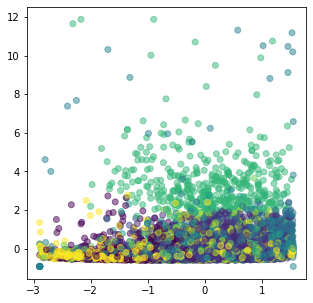

In [30]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 1], X_prep[:, 5], c=clusters,alpha=0.5)
plt.show()

In [31]:
kmeans.inertia_

66719.00077530683

In [32]:
%%time
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=100,
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

89729.02499240896
CPU times: user 2.95 s, sys: 986 ms, total: 3.94 s
Wall time: 677 ms


## Choosing k

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

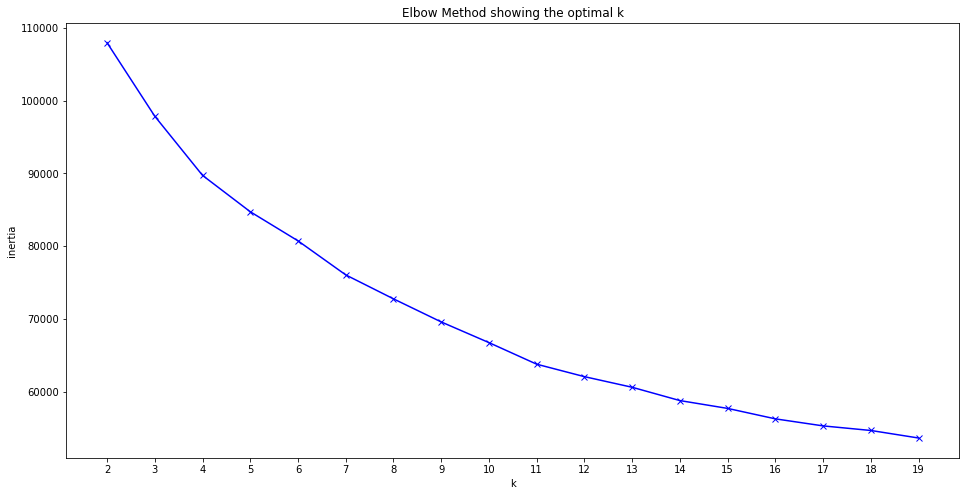

In [33]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

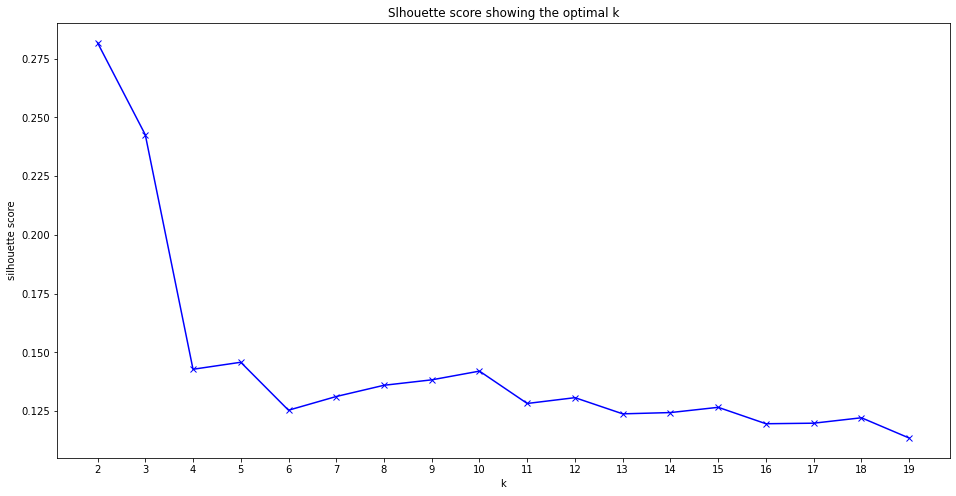

In [34]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')